In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('cons_data_all_res.xlsx')
print("Statistical Description : ")
print(data.describe())

Statistical Description : 
                      Time    year     moy_date     doy_date     dow_date   
count                 8760  8760.0  8760.000000  8760.000000  8760.000000  \
mean   2017-07-02 11:30:00  2017.0     6.526027   183.000000     3.991781   
min    2017-01-01 00:00:00  2017.0     1.000000     1.000000     1.000000   
25%    2017-04-02 05:45:00  2017.0     4.000000    92.000000     2.000000   
50%    2017-07-02 11:30:00  2017.0     7.000000   183.000000     4.000000   
75%    2017-10-01 17:15:00  2017.0    10.000000   274.000000     6.000000   
max    2017-12-31 23:00:00  2017.0    12.000000   365.000000     7.000000   
std                    NaN     0.0     3.448048   105.372043     2.003519   

              hour         temp        humid           r1           r2   
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000  \
mean     11.500000    28.658419    66.912808     0.224942     0.228293   
min       0.000000    17.500000    14.160000     0.010500

In [3]:
data['Time'] = pd.to_datetime(data['Time'], format='%d-%m-%y %H:%M')
data.set_index('Time', inplace=True)

In [4]:
# Selecting columns of interest
numeric_columns = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12']
data = data[numeric_columns]
print(data)

                         r1      r2      r3      r4      r5      r6      r7   
Time                                                                          
2017-01-01 00:00:00  0.1338  0.6225  0.0821  0.0667  0.2131  0.0854  0.1277  \
2017-01-01 01:00:00  0.1539  0.4753  0.0989  0.1047  0.1719  0.0948  0.1112   
2017-01-01 02:00:00  0.3061  0.7379  0.0990  0.1001  0.1865  0.0978  0.1850   
2017-01-01 03:00:00  0.3564  0.2106  0.1038  0.1354  0.1882  0.1064  0.0970   
2017-01-01 04:00:00  0.3306  0.1353  0.0780  0.3508  0.2092  0.2456  0.1374   
...                     ...     ...     ...     ...     ...     ...     ...   
2017-12-31 19:00:00  0.1499  0.2189  0.0447  0.0896  0.1475  0.0889  0.1258   
2017-12-31 20:00:00  0.1475  0.1456  0.0223  0.0584  0.1649  0.0883  0.1166   
2017-12-31 21:00:00  0.1500  0.1353  0.0521  0.1000  0.1887  0.0977  0.0997   
2017-12-31 22:00:00  0.1502  0.1113  0.0485  0.1067  0.1874  0.0950  0.1459   
2017-12-31 23:00:00  0.1489  0.1121  0.0293  0.0600 

In [5]:
hourly_average = data.groupby(data.index.hour).mean()

In [6]:
# Display the resulting DataFrame
print(hourly_average)

            r1        r2        r3        r4        r5        r6        r7   
Time                                                                         
0     0.200052  0.197753  0.170848  0.220809  0.261715  0.233755  0.160126  \
1     0.265084  0.198622  0.220714  0.443021  0.346108  0.431205  0.198229   
2     0.394541  0.176458  0.320237  0.344824  0.311458  0.326375  0.326563   
3     0.384672  0.195545  0.292034  0.267017  0.427191  0.259773  0.548022   
4     0.317515  0.244501  0.254059  0.271851  0.324156  0.315258  0.820854   
5     0.269072  0.218567  0.210258  0.272354  0.277208  0.442712  0.599871   
6     0.203981  0.202704  0.281209  0.274302  0.275284  0.514218  0.484130   
7     0.199699  0.233047  0.415082  0.242091  0.299647  0.566583  0.491414   
8     0.203534  0.298136  0.276081  0.296935  0.337961  0.263030  0.464102   
9     0.193352  0.239984  0.182418  0.264773  0.323786  0.254646  0.410819   
10    0.200652  0.210879  0.163211  0.267804  0.285675  0.253806

In [7]:
# Statistical descriptions
statistics = hourly_average.describe()

In [8]:
# Correlation matrix
correlation_matrix = hourly_average.corr()

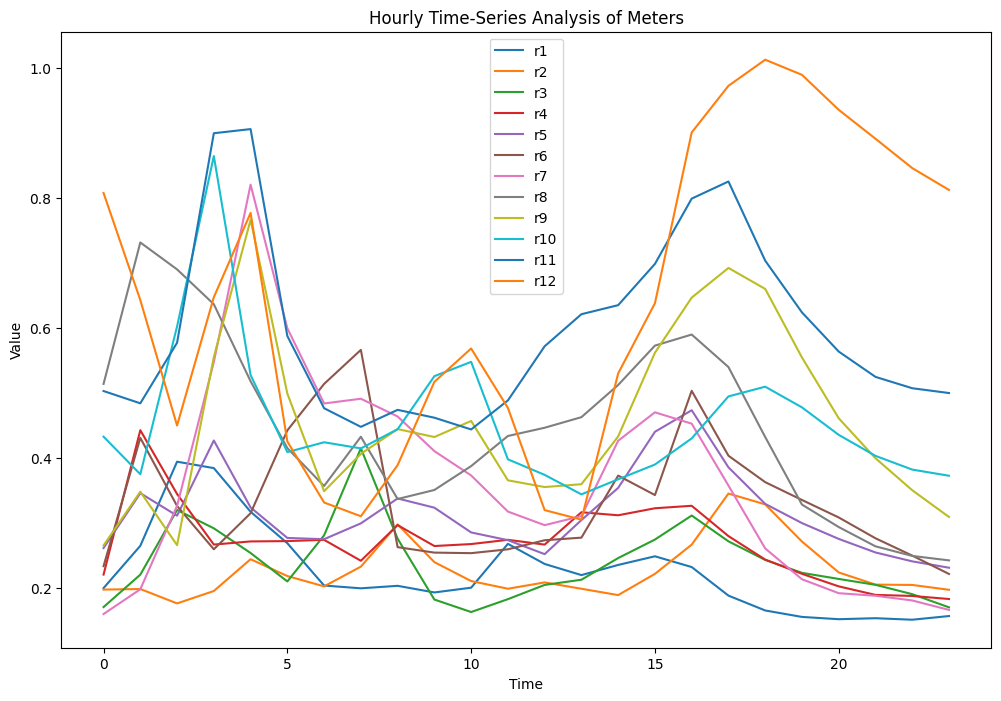

In [9]:
# Time-series analysis 
plt.figure(figsize=(12, 8))
for column in hourly_average.columns:
    plt.plot(hourly_average.index, hourly_average[column], label=column)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Hourly Time-Series Analysis of Meters')
plt.legend()
plt.show()

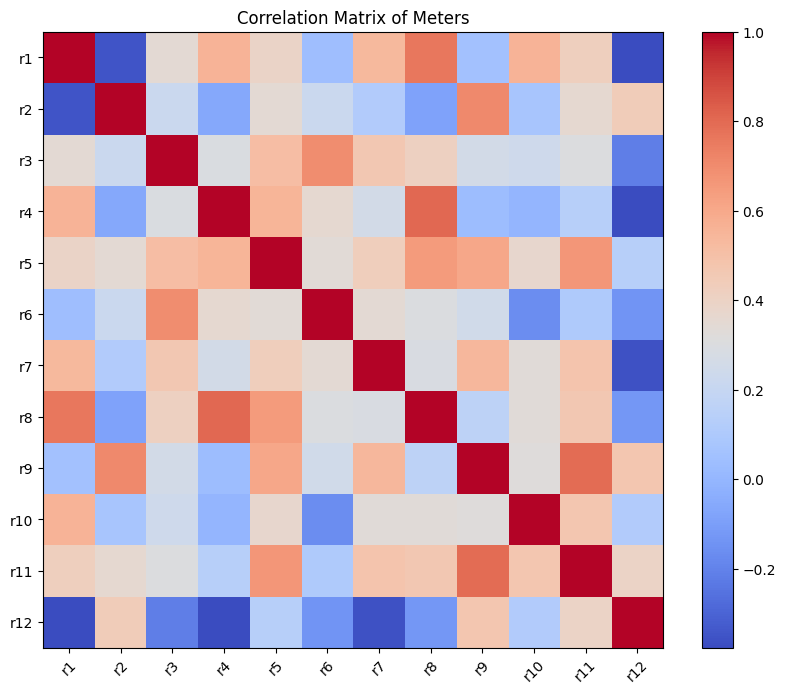

In [10]:
# Correlation matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of Meters')
plt.show()

In [11]:
print("Statistical Descriptions for Hourly Average:")
print(statistics)

Statistical Descriptions for Hourly Average:
              r1         r2         r3         r4         r5         r6   
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000  \
mean    0.224942   0.228293   0.239121   0.270619   0.316176   0.335506   
std     0.066914   0.044161   0.059085   0.058183   0.063405   0.096350   
min     0.151373   0.176458   0.163211   0.183237   0.231385   0.221779   
25%     0.182740   0.198918   0.201384   0.237063   0.274909   0.259760   
50%     0.203758   0.209820   0.222107   0.269828   0.302389   0.311992   
75%     0.253003   0.241113   0.275068   0.300723   0.339998   0.380790   
max     0.394541   0.345516   0.415082   0.443021   0.473731   0.566583   

              r7         r8         r9        r10        r11        r12  
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000  
mean    0.363074   0.447705   0.456057   0.456416   0.597176   0.646039  
std     0.162916   0.135410   0.136076   0.109363   0.140

In [12]:
print("Correlation Matrix for Hourly Average:")
print(correlation_matrix)

Correlation Matrix for Hourly Average:
           r1        r2        r3        r4        r5        r6        r7   
r1   1.000000 -0.346430  0.348197  0.558920  0.391485  0.041901  0.536747  \
r2  -0.346430  1.000000  0.222193 -0.064715  0.347841  0.220996  0.115592   
r3   0.348197  0.222193  1.000000  0.291278  0.511995  0.694529  0.464768   
r4   0.558920 -0.064715  0.291278  1.000000  0.552432  0.359424  0.263050   
r5   0.391485  0.347841  0.511995  0.552432  1.000000  0.337669  0.428366   
r6   0.041901  0.220996  0.694529  0.359424  0.337669  1.000000  0.346432   
r7   0.536747  0.115592  0.464768  0.263050  0.428366  0.346432  1.000000   
r8   0.758366 -0.081897  0.411475  0.803121  0.648391  0.295682  0.286019   
r9   0.057561  0.705102  0.261852  0.035062  0.602755  0.248820  0.540762   
r10  0.558711  0.078502  0.241757 -0.000559  0.366268 -0.166637  0.332751   
r11  0.421657  0.359802  0.302678  0.137210  0.662650  0.102679  0.481153   
r12 -0.376623  0.437971 -0.213877 -0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


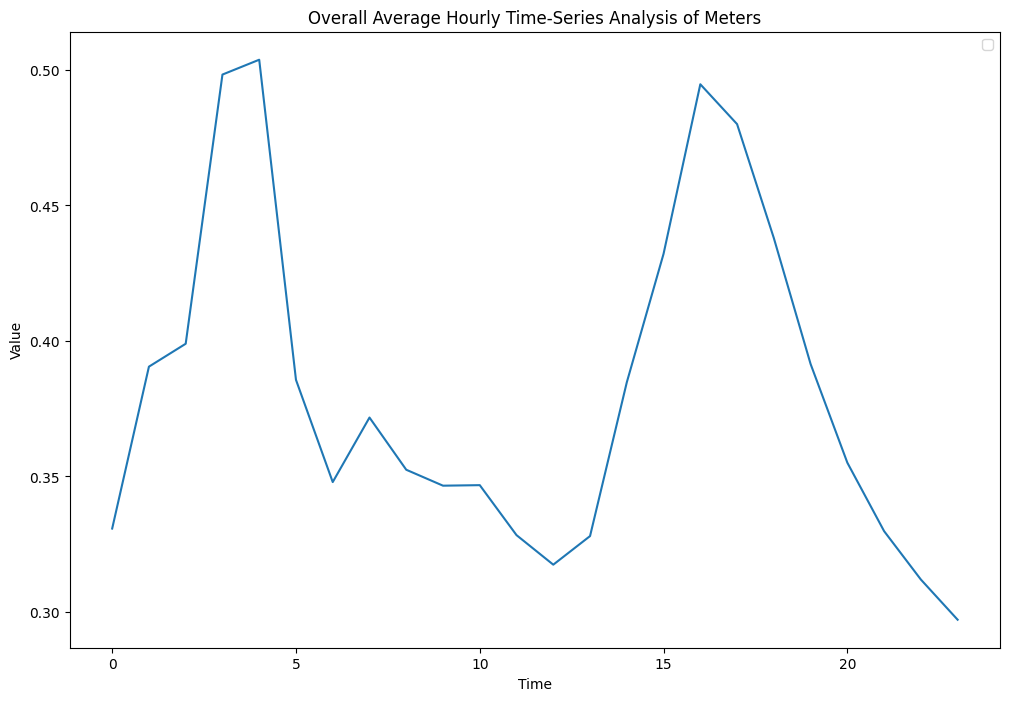

In [13]:
# Overall Average Hourly Time-Series Analysis of Meters
plt.figure(figsize=(12, 8))
plt.plot(hourly_average.index, hourly_average.mean(axis=1))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Overall Average Hourly Time-Series Analysis of Meters')
plt.legend()
plt.show()